<a href="https://colab.research.google.com/github/nitishwaa/Sentiment-analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import re
from cleantext import clean
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
plt.style.use("fivethirtyeight")

In [ ]:
bearer_token="AAAAAAAAAAAAAAAAAAAAALYwjQEAAAAAlJwIB%2BcSqW%2BN5yw45K3FmC4xLeQ%3D2TRaIVRtBRne51L7Rs1WCXRBaL5brApZMt8FK8XHMaGzQqhcry"
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.5 MB/s 


In [ ]:
name = 'elonmusk'

# Fetch user data
user=client.get_user(username=name).data

# Extract the user id and user name
user_id = user.id
user_name = user.name

# Fetch tweets by the user
tweets = client.get_users_tweets(id=user_id, tweet_fields=['id', 'text', 'created_at', 'context_annotations'],max_results=100)

print(f"Here are the recent tweets by {user_name}:\n")
i=1
for tweet in tweets.data[0:5]:
    print(i,tweet.text,'\n')
    #df=pd.insert
    i+=1


Here are the recent tweets by Elon Musk:

1 @chazman We’re working on something that should rank replies automatically 

2 Twitter is like open-sourcing the news 

3 @dogeofficialceo Polycule 🔥🔥 

4 @sama Probably 

5 @Dilbert_Daily Even TikTok is super dependent on ads 



In [ ]:

df=pd.DataFrame([tweet.text for tweet in tweets.data],columns=["Tweets"])
df.head()


,Tweets
0,@chazman We’re working on something that shoul...
1,Twitter is like open-sourcing the news
2,@dogeofficialceo Polycule 🔥🔥
3,@sama Probably
4,@Dilbert_Daily Even TikTok is super dependent ...


In [ ]:
# creating a function to clear out the text before analysing it
def cleantxt(txt):
  txt=re.sub(r'@[A-Za-z0-9]+','',txt)
  txt=re.sub(r'#','',txt)
  txt=re.sub(r'RT[\s]+','',txt)
  txt=re.sub(r'https?:\/\/\s+','',txt)
  txt=clean(txt, no_emoji=True)
  #txt=txt.strip
  return txt

In [ ]:
df['Tweets']=df['Tweets'].apply(cleantxt)
df['Tweets'].replace(' ', np.nan, inplace=True)
df['Tweets'].replace('', np.nan, inplace=True)
df= df.dropna()


In [ ]:
df.reset_index(inplace = True)
df["Tweets"]

0     we're working on something that should rank re...
1                twitter is like open-sourcing the news
2                                              polycule
3                                              probably
4          _daily even tiktok is super dependent on ads
                            ...                        
88    and we will finally stop adding what device a ...
89    part of today will be turning off the "microse...
90    i was told ~1200 rpcs independently by several...
91                                     that is not good
92                        this is up to the tesla board
Name: Tweets, Length: 93, dtype: object

In [ ]:
# function to get subjectivity
def getsubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

# function to get polarity
def getpolarity(txt):
  return TextBlob(txt).sentiment.polarity


# create two columns for subjectivity and polarity
df['subjectivity']=df['Tweets'].apply(getsubjectivity)
df['polarity']=df['Tweets'].apply(getpolarity)

In [ ]:
df

,index,Tweets,subjectivity,polarity
0,0,we're working on something that should rank re...,0.900000,-0.800000
1,1,twitter is like open-sourcing the news,0.000000,0.000000
2,2,polycule,0.000000,0.000000
3,3,probably,0.000000,0.000000
4,4,_daily even tiktok is super dependent on ads,0.333333,0.166667
...,...,...,...,...
88,95,and we will finally stop adding what device a ...,0.500000,-0.100000
89,96,"part of today will be turning off the ""microse...",0.083333,-0.083333
90,97,i was told ~1200 rpcs independently by several...,0.345833,-0.134375
91,98,that is not good,0.600000,-0.350000


<function matplotlib.pyplot.show(*args, **kw)>

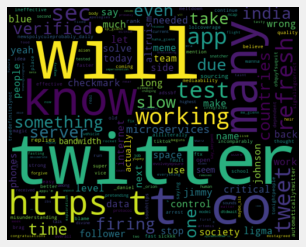

In [ ]:
allwords=''.join([twts for twts in df['Tweets']])
wordcloud=WordCloud(width=500, height=400, random_state=21,max_font_size=120).generate(allwords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [ ]:
def getanalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['polarity'].apply(getanalysis)
df

,index,Tweets,subjectivity,polarity,Analysis
0,0,we're working on something that should rank re...,0.900000,-0.800000,Negative
1,1,twitter is like open-sourcing the news,0.000000,0.000000,Neutral
2,2,polycule,0.000000,0.000000,Neutral
3,3,probably,0.000000,0.000000,Neutral
4,4,_daily even tiktok is super dependent on ads,0.333333,0.166667,Positive
...,...,...,...,...,...
88,95,and we will finally stop adding what device a ...,0.500000,-0.100000,Negative
89,96,"part of today will be turning off the ""microse...",0.083333,-0.083333,Negative
90,97,i was told ~1200 rpcs independently by several...,0.345833,-0.134375,Negative
91,98,that is not good,0.600000,-0.350000,Negative


In [ ]:
# print all of the positive tweets
j=1
sorteddf=df.sort_values(by='polarity')
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i]=='Positive'):
    print(str(j)+')'+' '+sorteddf['Tweets'][i])
    print()
    j+=1

1) _daily even tiktok is super dependent on ads

2) sbf is ineffective altruism, but they thought he was saying he was in effective altruism. easy misunderstanding.

3) _daniel i don't wanna brag but it's true

4) not to mention the sickkk memes lol

5) coverage of ftx meltdown is incomparably faster *and* better quality on twitter than old-school media

6) correct. i will continue to run twitter until it is in a strong place, which will take some time.

7) magic knows all

8) people have no idea how fast twitter will evolve

9) sure, let's talk.

10) i'm the taint haha

11) : live now: the artemis era of exploration begins today with i, the first integrated test flight of the rocket and sp

12) _glenn fasting + ozempic/wegovy + no tasty food near me

13) my apologies, this will be fixed within a week, two at most

14) agreed. what will matter in the future is how many verified followers you have.

15) hard to say who's celeb & who isn't. being able to sort by follower count & disallow

In [ ]:
# print all of the negative tweets
j=1
sorteddf=df.sort_values(by='polarity', ascending=False)
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i]=='Negative'):
    print(str(j)+')'+' '+sorteddf['Tweets'][i])
    print()
    j+=1

1) we're working on something that should rank replies automatically

2) ability to do long tweets coming soon

3) it's not his fault, society is to blame. arrest society!

4) wait a second, how do we know you're not an alien body snatcher pretending to be jimmy!?
say something that only the real jimmy would say

5) _glenn down 30 lbs!

6) false

7) important to admit when i'm wrong & firing them was truly one of my biggest mistakes

8) this is just as a result of people living longer. population collapse is already built-in, due to dramatically decreasing birth rates.

9) false

10) a tragic case of adult onset tourette's

11) _whales seriously

12) there are ~1200 "microservices" server side, of which ~40 are critical to twitter working at all, according to server control team.
trimming down that 1200 number, reducing data usage, serialized trips & simplifying app are all needed to improve speed of use.

13) twitter is very slow in india, indonesia & many other countries. this is fac

In [ ]:
j=1
sorteddf=df.sort_values(by='polarity', ascending=False)
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i]=='Neutral'):
    print(str(j)+')'+' '+sorteddf['Tweets'][i])
    print()
    j+=1

1) twitter is like open-sourcing the news

2) polycule

3) probably

4) definitely

5) https://t.co/o9quyfsuqv

6) i believe in vice-signaling

7) literally working on that tonight

8) yep

9) : model s received the highest overall score from euro ncap among any vehicle tested under the current protocol https://t.co/dtd

10) _serpent why is that?

11) sounds like a job for !

12) _ to heir is human, to forgive, divine (something like that)

13) fix what?

14) maybe

15) _sls _orion congratulations!!

16) x will be the everything app

17) _glenn yeah, next-level

18) yup

19) : https://t.co/2ylnmh97oz

20) we'll widen v11 beta before thanksgiving

21) all unpaid legacy blue checkmarks will be removed in a few months

22) welcoming back ligma & johnson! https://t.co/lehxv95njj

23) actual silicon valley is way crazier!

24) the injustice of it all

25) (cue obama giving himself a medal meme)

26) server control team knows because they stop working from time to time. that's why they have 

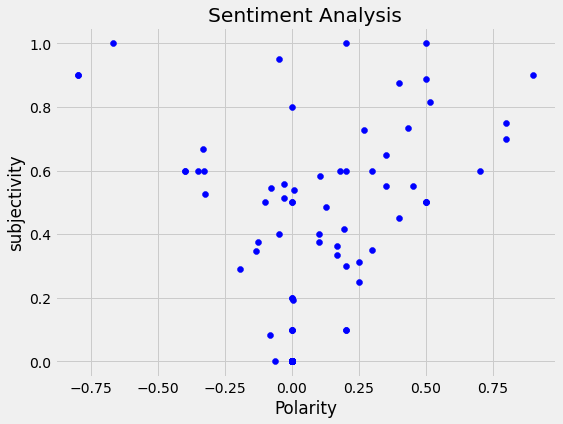

In [ ]:
# plot subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.show()

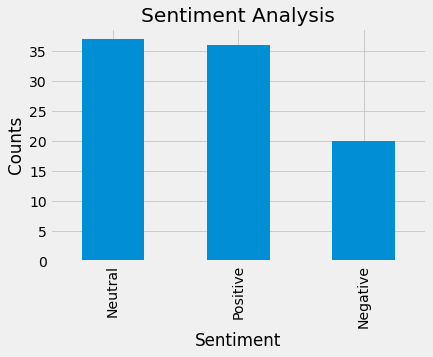

In [ ]:
df['Analysis'].value_counts()
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()